In [1]:
import torch

# Check if GPU is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(f"GPU name: {torch.cuda.get_device_name(0)}")

Using device: cuda
GPU name: NVIDIA GeForce RTX 4060 Laptop GPU


In [2]:
import pandas as pd

file_path = r"X:\Study\Projects\ML-Basics-Project\data\madrid.h5"

dfs = []
with pd.HDFStore(file_path, mode='r') as store:
    for key in store.keys():
        temp_df = store[key]
        temp_df['station_id'] = key  # Keep track of station
        dfs.append(temp_df)

df = pd.concat(dfs, ignore_index=True)
print(df.head())


     CO       NO_2        NOx        O_3        PM10  PM25  SO_2 station_id  \
0  0.37  58.400002  87.150002  34.529999  105.000000   NaN  6.34  /28079001   
1  0.42  65.760002  93.830002  27.930000   69.750000   NaN  7.15  /28079001   
2  0.32  61.090000  88.089996  32.070000   56.220001   NaN  6.26  /28079001   
3  0.23  47.020000  62.930000  42.209999   50.689999   NaN  5.19  /28079001   
4  0.19  47.169998  62.630001  48.459999   49.490002   NaN  5.03  /28079001   

   NO  BEN  ...  PXY  TCH  TOL  CH4  id  name  address  lon  lat elevation  
0 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
1 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
2 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
3 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
4 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  

[5 rows x 24 columns]


In [3]:
df.shape

(3808248, 24)

In [4]:
df.isnull().sum()

CO            1157236
NO_2            21198
NOx           1431973
O_3            816516
PM10           946993
PM25          2991824
SO_2          1032288
station_id          0
NO            2275851
BEN           2766564
EBE           2806524
MXY           3492833
NMHC          2722936
OXY           3492553
PXY           3492664
TCH           2721807
TOL           2769319
CH4           3793398
id            3808224
name          3808224
address       3808224
lon           3808224
lat           3808224
elevation     3808224
dtype: int64

In [5]:
print("Before:", df.shape)
df_new = df.dropna(subset=["lat", "lon"])
print("After:", df_new.shape)

Before: (3808248, 24)
After: (24, 24)


In [6]:
df_air = df.drop(columns=['id','name','address','lon','lat','elevation',
           'OXY','PXY','TCH','TOL','CH4','PM25', 'NO', 'BEN', 'EBE', 'MXY', 'NMHC'])

In [7]:
print(df_air.shape)
df=df_air
df.head()

(3808248, 7)


,CO,NO_2,NOx,O_3,PM10,SO_2,station_id
0,0.37,58.400002,87.150002,34.529999,105.000000,6.34,/28079001
1,0.42,65.760002,93.830002,27.930000,69.750000,7.15,/28079001
2,0.32,61.090000,88.089996,32.070000,56.220001,6.26,/28079001
3,0.23,47.020000,62.930000,42.209999,50.689999,5.19,/28079001
4,0.19,47.169998,62.630001,48.459999,49.490002,5.03,/28079001


In [8]:
df.describe()

,CO,NO_2,NOx,O_3,PM10,SO_2
count,2.651012e+06,3.787050e+06,2.376275e+06,2.991732e+06,2.861255e+06,2.775960e+06
mean,5.503838e-01,5.047151e+01,1.093188e+02,3.982616e+01,2.893654e+01,1.065539e+01
std,5.354483e-01,3.455288e+01,1.102871e+02,3.039249e+01,2.594859e+01,9.121267e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.600000e-01,2.400000e+01,4.000000e+01,1.271000e+01,1.150000e+01,5.840000e+00
50%,4.000000e-01,4.400000e+01,7.615000e+01,3.486000e+01,2.149000e+01,8.150000e+00
75%,6.500000e-01,6.958000e+01,1.397000e+02,5.999000e+01,3.775000e+01,1.230000e+01
max,1.804000e+01,6.286000e+02,2.537000e+03,2.360000e+02,6.950000e+02,1.991000e+02


In [9]:
print(df.isnull().sum())
df.shape

CO            1157236
NO_2            21198
NOx           1431973
O_3            816516
PM10           946993
SO_2          1032288
station_id          0
dtype: int64


(3808248, 7)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

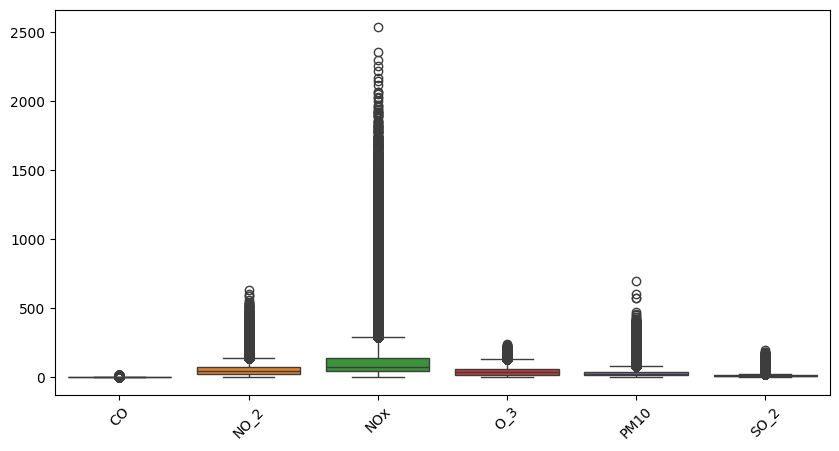

In [11]:
pollutant_cols = ['CO','NO_2','NOx','O_3','PM10','SO_2']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

In [12]:
df = df[~(df[pollutant_cols] == 0).any(axis=1)]
(df == 0).sum()

CO            0
NO_2          0
NOx           0
O_3           0
PM10          0
SO_2          0
station_id    0
dtype: int64

In [13]:
#outliers remove ke chakkkar mein pura data udd raha h . Thus , capped
def cap(df,col):
    q1 = df[col].quantile(0.20)
    q3 = df[col].quantile(0.80)
    iqr = q3 - q1 
    
    lower = q1 - 2*iqr
    upper = q3 + 2*iqr
    
    df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df

for col in pollutant_cols:
    df = cap(df,col)

#softening the effect of cap
for col in pollutant_cols:
    df[col]=np.log1p(df[col])

C:\Users\upman\AppData\Local\Temp\ipykernel_35472\2378926770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
C:\Users\upman\AppData\Local\Temp\ipykernel_35472\2378926770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
C:\Users\upman\AppData\Local\Temp\ipykernel_35472\2378926770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

<function matplotlib.pyplot.show(close=None, block=None)>

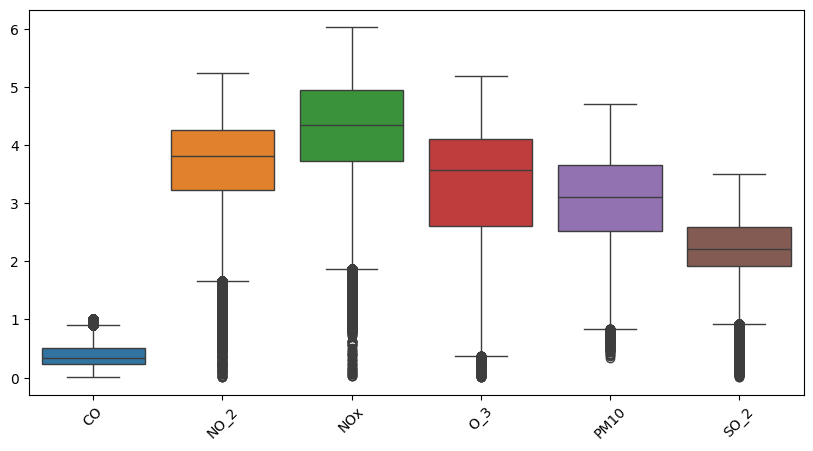

In [14]:
pollutant_cols = ['CO','NO_2','NOx','O_3','PM10','SO_2']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

In [15]:
from scipy.stats import skew

skewness_value = skew(df[pollutant_cols].dropna())
print(skewness_value)
print(pollutant_cols)

[ 0.87197874 -0.78989401 -0.27107319 -0.42320869 -0.24144805  0.32988585]
['CO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2']


In [16]:
# If skewness |value| < 0.5 → data roughly symmetric
# 👉 use Mean imputation

# If skewness > 0.5 (right-skewed)
# 👉 use Median or log-transform + mean (median better, kyunki outliers ka effect kam hota hai)

# If skewness < -0.5 (left-skewed)
# 👉 use Median (again safer, since mean distort ho sakta hai)

df['CO'].fillna(df['CO'].median(), inplace=True)
df['NO_2'].fillna(df['NO_2'].median(), inplace=True)
df['NOx'].fillna(df['NOx'].mean(), inplace=True)
df['O_3'].fillna(df['O_3'].mean(), inplace=True)
df['PM10'].fillna(df['PM10'].mean(), inplace=True)
df['SO_2'].fillna(df['SO_2'].mean(), inplace=True)

C:\Users\upman\AppData\Local\Temp\ipykernel_35472\3070033132.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CO'].fillna(df['CO'].median(), inplace=True)
C:\Users\upman\AppData\Local\Temp\ipykernel_35472\3070033132.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO'].fillna(df['CO'].median(), inplace=True)
C:\Users\upman\AppD

CO            0
NO_2          0
NOx           0
O_3           0
PM10          0
SO_2          0
station_id    0
dtype: int64
         CO      NO_2       NOx       O_3      PM10      SO_2 station_id
0  0.314811  4.084294  4.479040  3.570377  4.663439  1.993339  /28079001
1  0.350657  4.201104  4.552086  3.364879  4.259153  2.098018  /28079001
2  0.277632  4.128585  4.489647  3.498627  4.046904  1.982380  /28079001
3  0.207014  3.871618  4.157789  3.766072  3.945264  1.822935  /28079001
4  0.173953  3.874736  4.153085  3.901164  3.921775  1.796747  /28079001
(3801770, 7)


<function matplotlib.pyplot.show(close=None, block=None)>

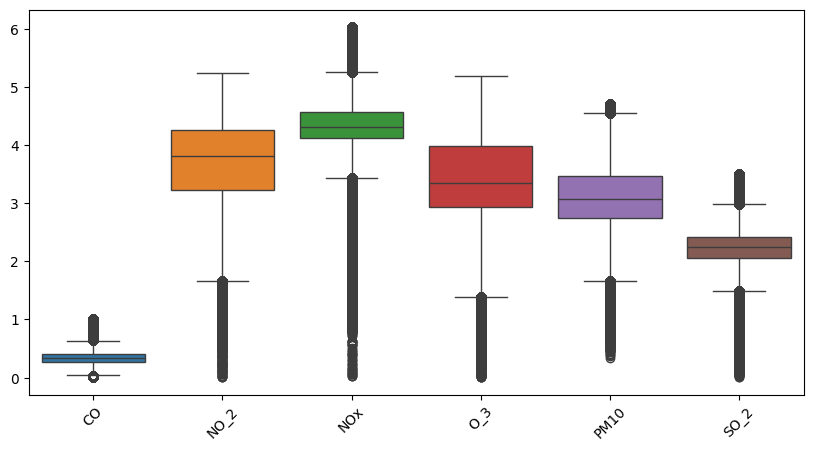

In [17]:
print(df.isnull().sum())
print(df.head())
print(df.shape)
pollutant_cols = ['CO','NO_2','NOx','O_3','PM10','SO_2']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

[ 1.54834969e+00 -7.39934189e-01 -2.79570209e-01 -6.77143426e-01
 -1.99855640e-01 -7.89383556e-04]
['CO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2']


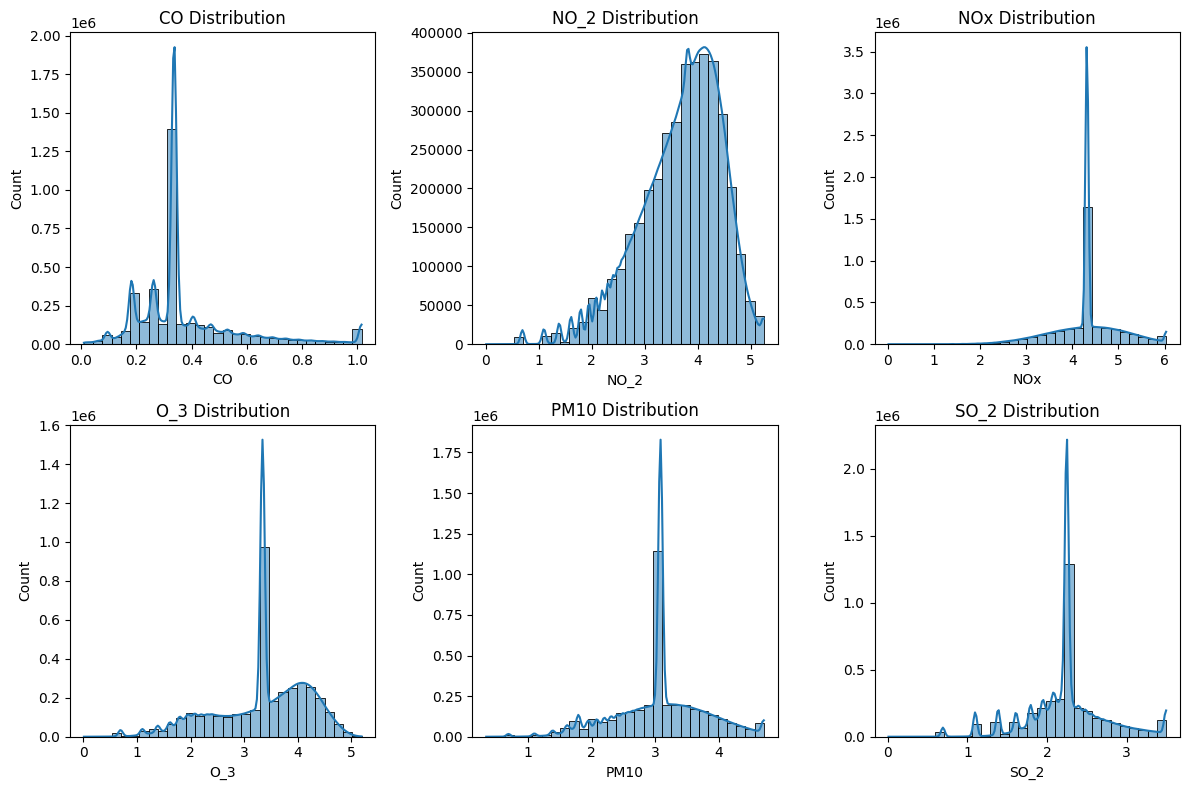

In [18]:

plt.figure(figsize=(12,8))
i = 1 

for col in pollutant_cols:
    plt.subplot(2, 3, i) 
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"{col} Distribution")
    i += 1 
skewness_value = skew(df[pollutant_cols].dropna())
print(skewness_value)
print(pollutant_cols)
plt.tight_layout()
plt.show()

In [19]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())
master_data=df

858104
0


In [20]:
# station-level representation
# station se fark padra h kya .
station_summary = df.groupby("station_id").agg(
    mean_PM10=("PM10", "mean"),
    median_PM10=("PM10", "median"),         #tell us the typical pollution level & variability of that station.
    std_PM10=("PM10", "std"),
    min_PM10=("PM10", "min"),
    max_PM10=("PM10", "max"),
    p10_PM10=("PM10", lambda x: x.quantile(0.1)), 
    p90_PM10=("PM10", lambda x: x.quantile(0.9)),
    sample_count_PM10=("PM10", "count")
).reset_index()
station_summary.head()

,station_id,mean_PM10,median_PM10,std_PM10,min_PM10,max_PM10,p10_PM10,p90_PM10,sample_count_PM10
0,/28079001,3.397237,3.471811,0.739270,0.570980,4.702841,2.364621,4.312543,71818
1,/28079003,3.191574,3.130263,0.734779,0.385262,4.702841,2.150599,4.144562,86558
2,/28079004,3.088057,3.079708,0.721919,0.615186,4.702841,2.031957,4.059581,100450
3,/28079006,3.429805,3.495295,0.723163,0.559616,4.702841,2.437116,4.328534,74848
4,/28079007,3.169664,3.220475,0.769369,0.542324,4.702841,2.064328,4.144721,75939


In [21]:
q1 = station_summary["median_PM10"].quantile(0.33)
q2 = station_summary["median_PM10"].quantile(0.66)

def pollution_flag(score):
    if score <= q1:
        return "very good"
    elif score <= q2:
        return "okay"
    else:
        return "bad"

station_summary["station_health"] = station_summary["median_PM10"].apply(pollution_flag)
station_summary.sample(10)

,station_id,mean_PM10,median_PM10,std_PM10,min_PM10,max_PM10,p10_PM10,p90_PM10,sample_count_PM10,station_health
26,/28079040,3.068204,3.115292,0.781261,0.457425,4.702841,1.945910,4.060443,118494,okay
30,/28079050,2.982422,3.066657,0.807082,0.693147,4.702841,1.945910,3.951244,19060,very good
7,/28079011,3.074410,3.079708,0.757614,0.412110,4.702841,1.965713,4.052324,89130,very good
10,/28079015,3.340041,3.390136,0.759783,0.398776,4.702841,2.263844,4.287716,67837,bad
16,/28079022,3.263800,3.305054,0.751684,0.631272,4.702841,2.235376,4.233817,77541,bad
18,/28079024,2.913978,2.944439,0.726074,0.457425,4.702841,1.945910,3.844172,144231,very good
32,/28079055,3.039687,3.091042,0.842998,0.431782,4.702841,1.800058,4.094345,21259,okay
24,/28079038,3.215360,3.222868,0.750316,0.598836,4.702841,2.189416,4.174387,115215,bad
1,/28079003,3.191574,3.130263,0.734779,0.385262,4.702841,2.150599,4.144562,86558,bad
38,/28079099,3.252796,3.261169,0.673730,1.324419,4.702841,2.344686,4.144721,87602,bad


In [22]:
station_summary['station_health'].value_counts() # thus regression mein leakage rokne ke liye groupby spit karenge    

station_health
very good    20
bad          14
okay          6
Name: count, dtype: int64

In [23]:
df.sample(6)

,CO,NO_2,NOx,O_3,PM10,SO_2,station_id
630288,1.015231,5.132263,5.904271,2.226783,4.235410,3.040706,/28079009
2283552,0.463734,4.457598,5.238036,1.888584,3.145875,2.422144,/28079035
1864723,0.182322,3.526361,4.316728,4.262680,3.091042,1.791759,/28079024
367400,0.457425,4.523092,5.096201,3.245323,3.667145,2.323368,/28079006
1547565,0.364643,4.387014,4.649187,2.364621,2.629007,2.336987,/28079019
2649962,0.262364,4.077537,4.316728,2.639057,3.079708,2.247146,/28079039


In [24]:
print(df.shape)
df.describe()

(2943666, 7)


,CO,NO_2,NOx,O_3,PM10,SO_2
count,2.943666e+06,2.943666e+06,2.943666e+06,2.943666e+06,2.943666e+06,2.943666e+06
mean,3.931409e-01,3.814266e+00,4.320637e+00,3.304432e+00,3.128775e+00,2.289005e+00
std,2.084170e-01,7.162120e-01,7.813816e-01,8.862342e-01,7.429069e-01,5.232045e-01
min,9.950331e-03,9.950331e-03,1.980263e-02,9.950331e-03,3.435897e-01,9.950331e-03
25%,2.623643e-01,3.401197e+00,3.897518e+00,2.717340e+00,2.708050e+00,2.018895e+00
50%,3.364722e-01,3.928093e+00,4.316728e+00,3.342186e+00,3.079708e+00,2.247146e+00
75%,4.700036e-01,4.330733e+00,4.789989e+00,3.989910e+00,3.622473e+00,2.558777e+00
max,1.015231e+00,5.247761e+00,6.031790e+00,5.188781e+00,4.702841e+00,3.494384e+00


In [25]:
#Feature Enginnering for regression
df_reg = df.copy()
# Vehicles → NOx, CO, some SO₂, + PM10 directly.
# Industries → SO₂, NOx, + PM10 directly.
# PM10 → dono ka combined impact + extra dust sources.
df_reg["station_code"] = df_reg["station_id"].astype("category").cat.codes
df_reg["CO_m_NOx"]  = df_reg["CO"]  - df_reg["NOx"]
df_reg["NO2_m_NOx"] = df_reg["NO_2"]- df_reg["NOx"]
df_reg["O3_m_NOx"]  = df_reg["O_3"] - df_reg["NOx"]
df_reg["SO2_m_NOx"] = df_reg["SO_2"]- df_reg["NOx"]
#NOx dono mein common he 
#NOx ek traffic-related pollutant hai, aur PM10 bhi mostly traffic + dust sources se linked hota hai. 
#Agar tum bas raw pollutants lete ho (CO, NO₂, O₃, SO₂, NOx), toh model ko relation dhoondhna thoda “spread out” hoga.
df_reg.sample(6)


,CO,NO_2,NOx,O_3,PM10,SO_2,station_id,station_code,CO_m_NOx,NO2_m_NOx,O3_m_NOx,SO2_m_NOx
1548056,0.412110,4.626932,5.043425,3.134189,3.549905,2.274186,/28079019,14,-4.631315,-0.416493,-1.909236,-2.769239
2672988,0.076961,4.285791,4.431174,4.244487,2.562639,2.052841,/28079039,25,-4.354213,-0.145383,-0.186687,-2.378333
51649,0.322083,3.560193,3.938275,3.993234,3.461351,2.066863,/28079001,0,-3.616192,-0.378082,0.054959,-1.871413
115981,0.647103,3.794590,4.712229,2.520917,3.574310,3.494384,/28079003,1,-4.065126,-0.917639,-2.191312,-1.217845
2531529,0.779325,4.019082,4.796617,2.297573,3.917806,3.389125,/28079038,24,-4.017292,-0.777535,-2.499044,-1.407492
3514196,0.336472,2.197225,4.316728,4.727388,3.079708,2.247146,/28079058,35,-3.980256,-2.119504,0.410659,-2.069582


In [26]:
#pollutants ke combination bana rahe ho jo research literature mein air-quality ke liye kaafi common hai.
df_reg["OX"] = np.log1p(np.expm1(df_reg["O_3"]) + np.expm1(df_reg["NO_2"]))   #OX index = O₃ + NO₂
#np.expm1() (reverse log) #Fir np.log1p() use karke dobara log-scale pe
df_reg["COMB"] = np.log1p(np.expm1(df_reg["CO"]) + np.expm1(df_reg["NOx"]) + np.expm1(df_reg["SO_2"]))
#CO, NOx, SO₂  # industrial+vehicle
df_reg.sample(6)

,CO,NO_2,NOx,O_3,PM10,SO_2,station_id,station_code,CO_m_NOx,NO2_m_NOx,O3_m_NOx,SO2_m_NOx,OX,COMB
587488,0.254642,3.725452,4.014219,4.573680,1.791759,2.157559,/28079008,5,-3.759576,-0.288766,0.559461,-1.856659,4.922824,4.148201
2376586,0.300105,4.034595,4.476427,3.393837,3.530470,1.660131,/28079036,23,-4.176323,-0.441833,-1.082590,-2.816296,4.446174,4.527533
125443,0.412110,4.119037,4.223617,3.560193,3.678577,1.811562,/28079003,1,-3.811507,-0.104580,-0.663423,-2.412055,4.560905,4.302848
3301818,0.336472,3.465736,3.555348,3.342186,1.609438,2.247146,/28079055,32,-3.218876,-0.089612,-0.213163,-1.308202,4.082287,3.781019
1294320,0.336472,4.499810,4.316728,3.342186,3.079708,2.564949,/28079017,12,-3.980256,0.183081,-0.974543,-1.751779,4.764572,4.469843
1357663,0.405465,3.713572,4.316728,1.386294,2.890372,1.386294,/28079018,13,-3.911263,-0.603156,-2.930434,-2.930434,3.784190,4.362373


In [27]:
from sklearn.model_selection import GroupShuffleSplit
df_reg = df_reg.drop(columns=['station_id'])
groups = df_reg["station_code"]
splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(splitter.split(df_reg, groups=groups))
df_train = df_reg.iloc[train_idx]
df_test  = df_reg.iloc[test_idx]

In [34]:
from sklearn.linear_model import LinearRegression
X_train = df_train.drop(columns=["PM10"])
y_train = df_train["PM10"]
X_test = df_test.drop(columns=["PM10"])
y_test = df_test["PM10"]

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)


MAE : 0.4933691975298967


In [35]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score

r2_score1=r2_score(y_pred,y_test)
print(r2_score1)

-1.269006257024473


In [29]:
#Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Ridge model
ridge = Ridge()

# Hyperparameter grid
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5,1e-4 ,1e-3, 1e-2, 1, 5, 10, 20 , 30, 35 , 40 , 45 , 50 , 55,60,75,80 , 100]}

# GridSearchCV setup
ridge_regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)

# Fit model
ridge_regressor.fit(X_train, y_train)

# Best parameters & score
print("Best Alpha:", ridge_regressor.best_params_)
print("Best Score:", ridge_regressor.best_score_)


Best Alpha: {'alpha': 100}
Best Score: -0.3783226014911169


In [32]:
y_pred = ridge_regressor.predict(X_test)
from sklearn.metrics import r2_score

r2_score1=r2_score(y_pred,y_test)
print(r2_score1)

-1.274436351942057


In [30]:
from sklearn.linear_model import Lasso

lasso=Lasso()

# GridSearchCV setup
lasso_regressor = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)

# Fit model
lasso_regressor.fit(X_train, y_train)

print("Best Alpha:", lasso_regressor.best_params_)
print("Best Score:", lasso_regressor.best_score_)

c:\Users\upman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.109e+05, tolerance: 8.747e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\upman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.045e+05, tolerance: 8.829e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\upman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Best Alpha: {'alpha': 0.001}
Best Score: -0.3778154096968059


In [31]:
y_pred = lasso_regressor.predict(X_test)
from sklearn.metrics import r2_score

r2_score1=r2_score(y_pred,y_test)
print(r2_score1)

-1.3211661941574913


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,      # restrict tree depth
    random_state=1,
    n_jobs=-1
)


# Train the model
rf_reg.fit(X_train, y_train)

# Cross-validation for MSE (negative MSE → convert to positive)
mse = cross_val_score(rf_reg, X_train, y_train,
                      scoring='neg_mean_squared_error',
                      cv=5)

print("MSE (each fold): ", mse)
print("MSE Mean: ", mse.mean())

# Optional: Check accuracy on test set
y_pred = rf_reg.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error

print("R² score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Random Forest Diagnostics ----
y_pred_rf = rf_reg.predict(X_test)
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(12,5))

# Scatter: Predicted vs Actual
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual PM10")
plt.ylabel("Predicted PM10")
plt.title("Random Forest: Predicted vs Actual")

# Residual plot
plt.subplot(1,2,2)
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted PM10")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Random Forest: Residuals")

plt.tight_layout()
plt.show()


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error

# Make the XGBoost model
xgb_reg = XGBRegressor(
    n_estimators=100,   # number of boosting rounds
    learning_rate=0.1,      # depth of each tree
    max_depth=10,
    random_state=1,
    tree_method="gpu_hist",
    n_jobs=-1
)

# Train the model
xgb_reg.fit(X_train, y_train)

# Cross-validation for MSE
mse = cross_val_score(xgb_reg, X_train, y_train,
                      scoring='neg_mean_squared_error',
                      cv=5)

# Convert to positive values
mse = -mse

print("MSE (each fold): ", mse)
print("MSE Mean: ", mse.mean())

# Test set evaluation
y_pred = xgb_reg.predict(X_test)

print("R² score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))


In [ ]:
y_pred_xgb = xgb_reg.predict(X_test)
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(12,5))

# Scatter: Predicted vs Actual
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6, color="orange")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual PM10")
plt.ylabel("Predicted PM10")
plt.title("XGBoost: Predicted vs Actual")

# Residual plot
plt.subplot(1,2,2)
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb, alpha=0.6, color="orange")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted PM10")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("XGBoost: Residuals")

plt.tight_layout()
plt.show()